<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Photo Color Scheme</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

%matplotlib inline

Let's take a look at how we can manipulate images. Let's start by reading a JPG image file:

In [2]:
img = mpimg.imread("https://github.com/DataForScience/Viz4Sci/raw/master/data/colors.jpg",
                 format='jpg')

Which we can easily plot using **imshow**

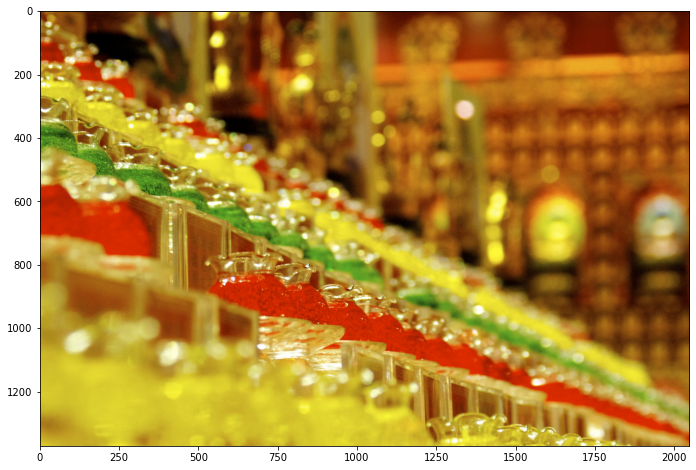

In [3]:
fig, ax = plt.subplots(1)
ax.imshow(img)
fig.set_size_inches(16, 8)

It's very useful to keep in mind that images are just arrays of numbers.

In [4]:
print(img.dtype, img.shape)

uint8 (1371, 2048, 3)


In this image, we have 3 layers (one for each __R__ed, __G__reen, and __B__lue channels). We can take a look at each channel separately:

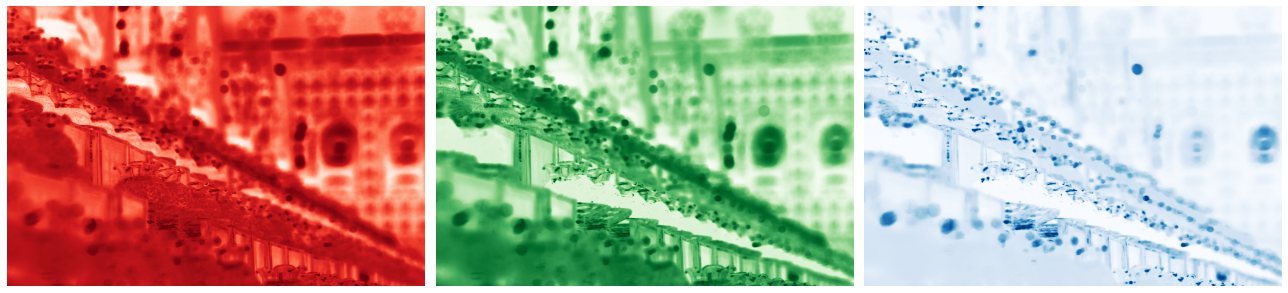

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(img[:,:,0], cmap=plt.get_cmap('Reds'))
axs[0].set_axis_off()

axs[1].imshow(img[:,:,1], cmap=plt.get_cmap('Greens'))
axs[1].set_axis_off()

axs[2].imshow(img[:,:,2], cmap=plt.get_cmap('Blues'))
axs[2].set_axis_off()

fig.tight_layout()

We can also flatten this 3D array into a two dimensional matrix where each column corresponds to a different color channel and each row to an individual pixel.

In [6]:
img_flat = img.reshape(img.shape[0] * img.shape[1], 3)

In this formulation, it is trivial to visualize the color space of the image. Here we use a 3D scatter plot to plot each pixel individually in the (R, G, B) coordinate system. The color of each point is the corresponding pixel color

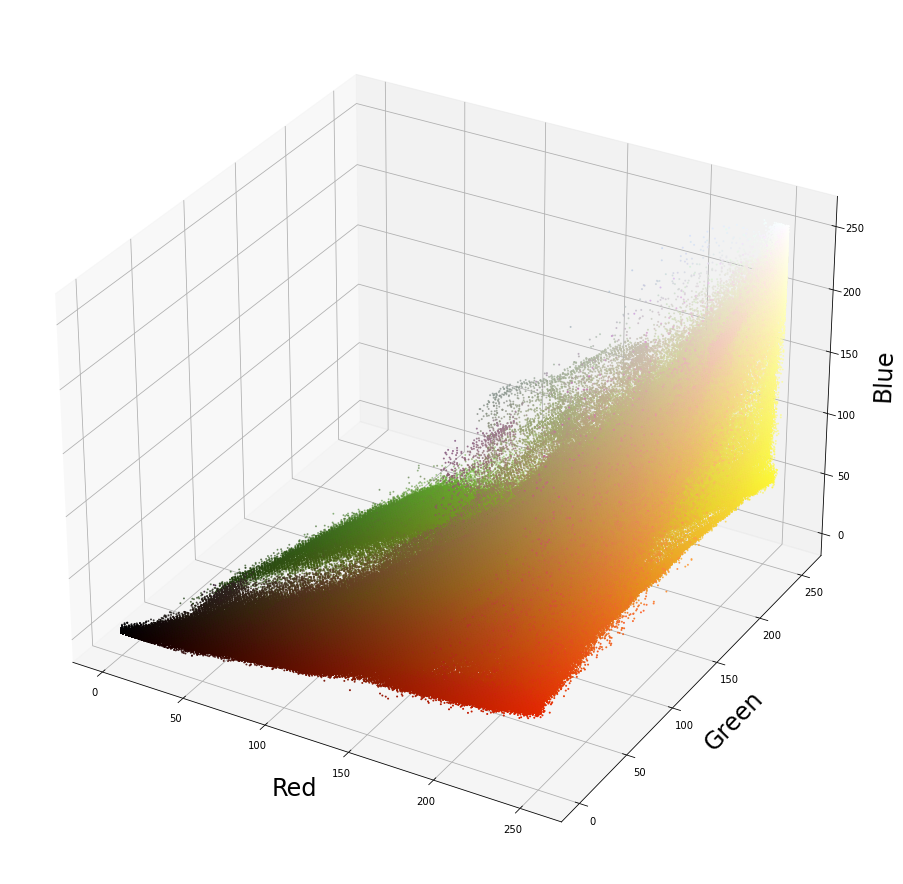

In [7]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nRed", fontsize=24)
ax.set_ylabel("\nGreen", fontsize=24)
ax.set_zlabel("\nBlue", fontsize=24)

ax.scatter(xs=img_flat[:, 0], 
           ys=img_flat[:, 1], 
           zs=img_flat[:, 2], 
           s=1, 
           # scatter expects color components in the [0, 1] range
           color=img_flat/255)

# Color clustering

If we treat the matrix above as just a set of points, we can think of clustering the colors. Let's use KMeans as a simple first approach and select 16 clusters (colors)

In [8]:
km = KMeans(n_clusters=16)
km.fit(img_flat)

KMeans(n_clusters=16)

The colors selected by KMeans are just the cluster centers.

In [9]:
colors = km.cluster_centers_.astype('uint8')

A quick function to convert the RGB components into Hex representation

In [10]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % tuple(rgb)

In [11]:
colors_rgb = [rgb_to_hex(color) for color in colors]

In [12]:
colors_rgb

['#b99b2c',
 '#7d3a0a',
 '#e6da33',
 '#a58024',
 '#ca2b01',
 '#e2d88c',
 '#241004',
 '#d4c02c',
 '#f5f2ce',
 '#ce7e1c',
 '#592607',
 '#925111',
 '#5f8f20',
 '#d2bf64',
 '#ab6315',
 '#c3a94a']

Most matplotlib expect RGB components to be in the range [0, 1] so we convert the values now

In [13]:
colors = colors/255.

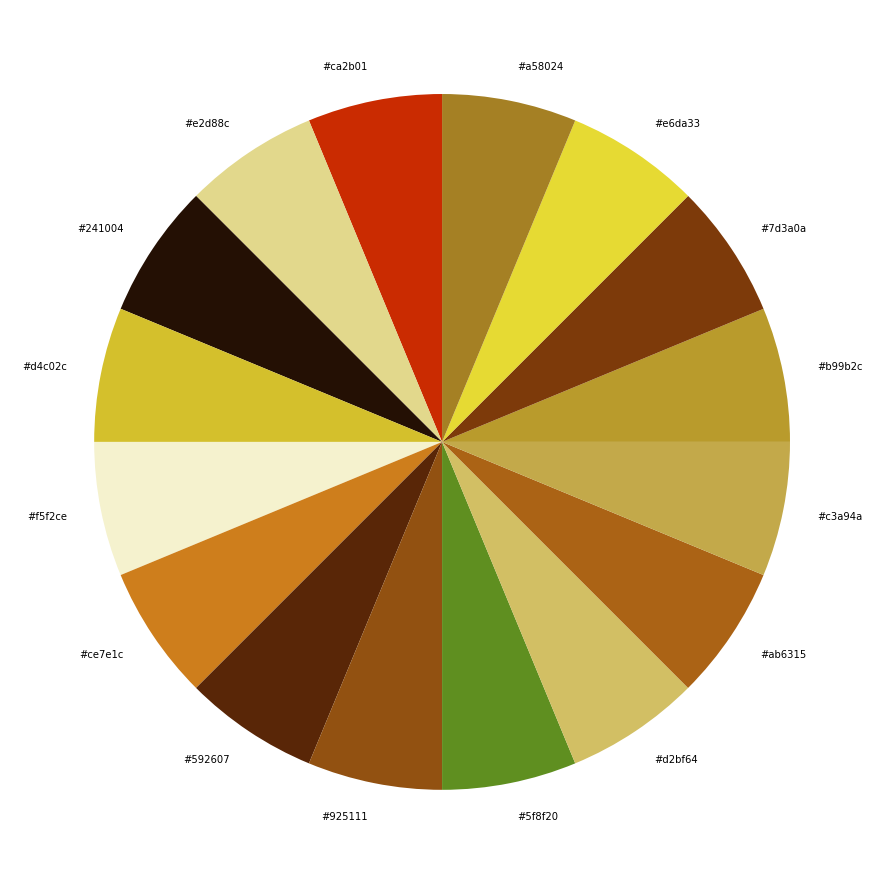

In [14]:
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.pie(np.ones(km.n_clusters), labels=colors_rgb, colors=colors);

If we now replace each pixel with the color corresponding to the cluster it belongs to

In [15]:
recolor_img = colors[km.predict(img_flat)].reshape(img.shape)

We obtain a version of the original image reduced to just 16 unique colors, a simple form of image compression:

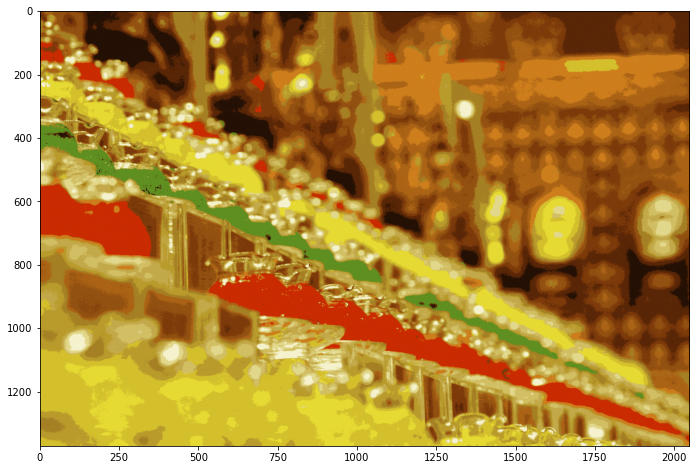

In [16]:
fig, ax = plt.subplots(1, figsize=(16, 8))
ax.imshow(recolor_img)

When placed side by side, the difference is obvious

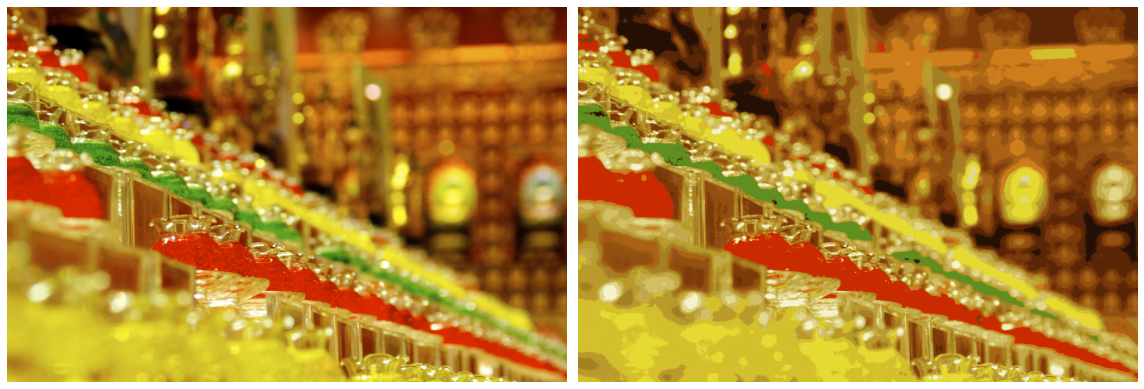

In [17]:
fig, ax_lst = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_lst[0].imshow(img)
ax_lst[1].imshow(recolor_img)
ax_lst[0].axis('off')
ax_lst[1].axis('off')
fig.tight_layout()

One important point to note is that the KMeans cluster centroids are not guaranteed to be part of the original set of colors as they are computed by taking the average across all points belonging to the cluster. This is what explains the "washed out" color effect we see on the figure above.

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>